In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import stability
from unseen import indices

In [42]:
agcd_file = "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_AGCD-CSIRO_r005_1900-2022_annual-aug-to-sep_east-coast-flood-region.zarr.zip"

model_files = {
    'CAFE': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_CAFE-c5-d60-pX-f6_19950501-20201101_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'CanESM5': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_CanESM5-dcppA-hindcast_196101-201701_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'CMCC-CM2-SR5': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_CMCC-CM2-SR5-dcppA-hindcast_196011-201911_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'EC-Earth3': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_EC-Earth3-dcppA-hindcast_196011-201711_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'HadGEM3-GC31-MM': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_HadGEM3-GC31-MM-dcppA-hindcast_196011-201811_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'IPSL-CM6A-LR': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_IPSL-CM6A-LR-dcppA-hindcast_196101-201701_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'MIROC6': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_MIROC6-dcppA-hindcast_196011-201811_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'MPI-ESM1-2-HR': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_MPI-ESM1-2-HR-dcppA-hindcast_196011-201811_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
    'MRI-ESM2-0': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_MRI-ESM2-0-dcppA-hindcast_196011-201911_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
#    'NorCPM1': "/g/data/xv83/dbi599/east-coast-rain/data/Rx15day_NorCPM1-dcppA-hindcast_196010-201810_annual-aug-to-sep_east-coast-flood-region_bias-corrected-AGCD-CSIRO-multiplicative.zarr.zip",
}

# NorCPM1 fails the similarity test

In [43]:
agcd_ds = fileio.open_dataset(agcd_file)
agcd_ds = agcd_ds.dropna('time')

In [44]:
agcd_max = agcd_ds['pr'].values.max()
print(agcd_max)

410.43057


/g/data/xv83/dbi599/east-coast-rain/figures/Rx15day_gev-pdf-and-return-curves_ensemble.png


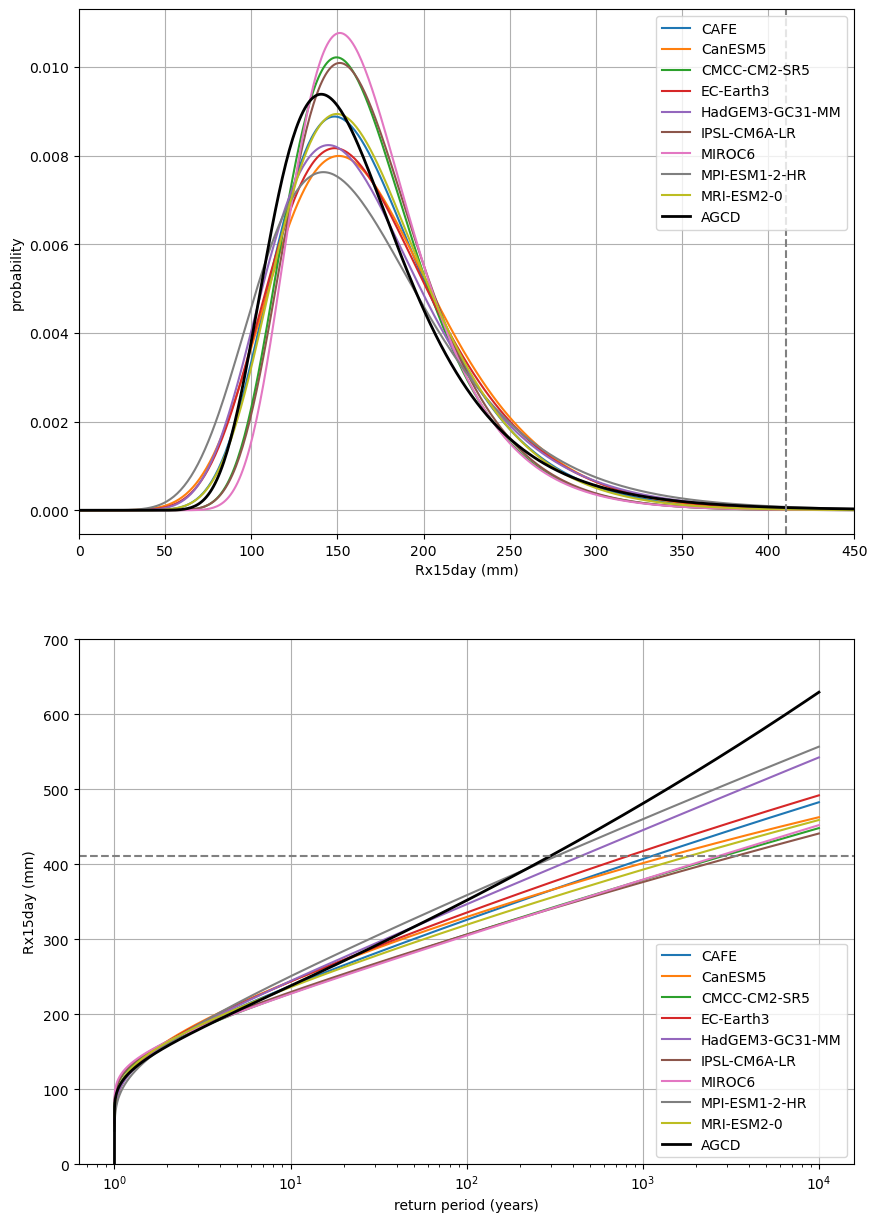

In [52]:
fig = plt.figure(figsize=[10, 15])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Plot models
for model_name, model_file in model_files.items():
    model_ds = fileio.open_dataset(model_file)
    model_da = model_ds['pr'].dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})

    model_return_periods, model_return_values = stability.return_curve(model_da, 'gev')
    ax2.plot(model_return_periods, model_return_values, label=model_name)

    model_gev_shape, model_gev_loc, model_gev_scale = indices.fit_gev(model_da.values)
    model_gev_pdf = gev.pdf(gev_xvals, model_gev_shape, model_gev_loc, model_gev_scale)
    ax1.plot(gev_xvals, model_gev_pdf, label=model_name)
    
# Plot obs
agcd_gev_shape, agcd_gev_loc, agcd_gev_scale = indices.fit_gev(agcd_ds['pr'].values)
agcd_gev_pdf = gev.pdf(gev_xvals, agcd_gev_shape, agcd_gev_loc, agcd_gev_scale)
ax1.plot(gev_xvals, agcd_gev_pdf, color='black', linewidth=2.0, label='AGCD')

agcd_return_periods, agcd_return_values = stability.return_curve(agcd_ds['pr'], 'gev')
ax2.plot(agcd_return_periods, agcd_return_values, label='AGCD', color='black', linewidth=2.0)

ax1.grid()
ax1.set_xlabel('Rx15day (mm)')
ax1.set_ylabel('probability')
ax1.axvline(agcd_max, color='0.5', linestyle='--')
ax1.set_xlim([0, 450])
ax1.legend()

ax2.legend()
ax2.axhline(agcd_max, color='0.5', linestyle='--')
ax2.set_xscale('log')
ax2.set_xlabel('return period (years)')
ax2.set_ylabel('Rx15day (mm)')
ax2.set_ylim([0, 700])
ax2.grid()

outfile = '/g/data/xv83/dbi599/east-coast-rain/figures/Rx15day_gev-pdf-and-return-curves_ensemble.png'
plt.savefig(outfile, bbox_inches='tight', facecolor='white', dpi=400)
print(outfile)
#plt.show()

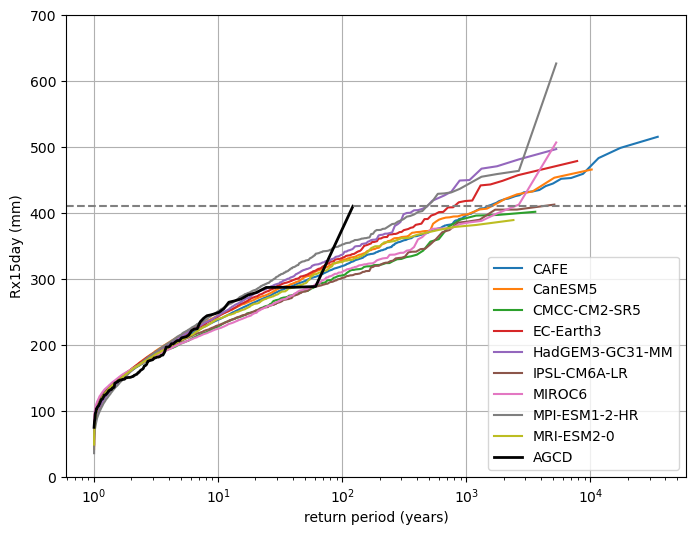

In [46]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot()

# Plot models
for model_name, model_file in model_files.items():
    model_ds = fileio.open_dataset(model_file)
    model_da = model_ds['pr'].dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})
    model_return_periods, model_return_values = stability.return_curve(model_da, 'empirical')
    ax.plot(model_return_periods, model_return_values, label=model_name)

# Plot obs
agcd_ds = fileio.open_dataset(agcd_file)
agcd_ds = agcd_ds.dropna('time')
agcd_return_periods, agcd_return_values = stability.return_curve(agcd_ds['pr'], 'empirical')
ax.plot(agcd_return_periods, agcd_return_values, label='AGCD', color='black', linewidth=2.0)
    
ax.legend()
ax.axhline(agcd_max, color='0.5', linestyle='--')
ax.set_xscale('log')
ax.set_xlabel('return period (years)')
ax.set_ylabel('Rx15day (mm)')
ax.set_ylim([0, 700])
ax.grid()

#plt.savefig(outfile, bbox_inches='tight', facecolor='white', dpi=dpi)
#print(outfile)
plt.show()

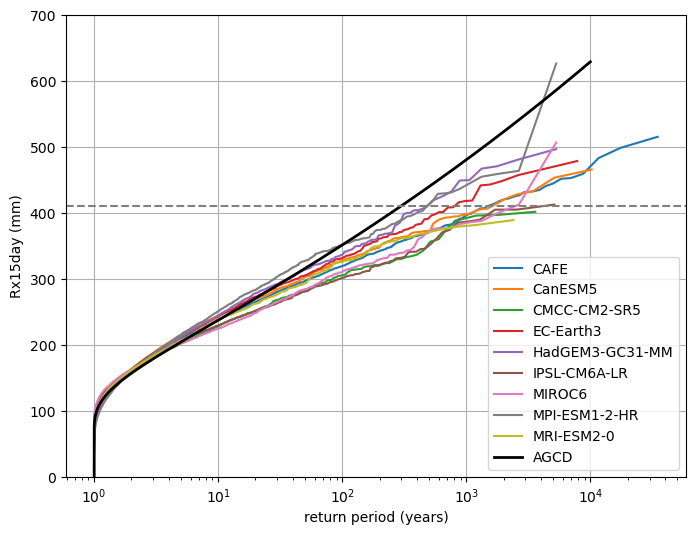

In [47]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot()

# Plot models
for model_name, model_file in model_files.items():
    model_ds = fileio.open_dataset(model_file)
    model_da = model_ds['pr'].dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})
    model_return_periods, model_return_values = stability.return_curve(model_da, 'empirical')
    ax.plot(model_return_periods, model_return_values, label=model_name)

# Plot obs
agcd_ds = fileio.open_dataset(agcd_file)
agcd_ds = agcd_ds.dropna('time')
agcd_return_periods, agcd_return_values = stability.return_curve(agcd_ds['pr'], 'gev')
ax.plot(agcd_return_periods, agcd_return_values, label='AGCD', color='black', linewidth=2.0)
    
ax.legend()
ax.axhline(agcd_max, color='0.5', linestyle='--')
ax.set_xscale('log')
ax.set_xlabel('return period (years)')
ax.set_ylabel('Rx15day (mm)')
ax.set_ylim([0, 700])
ax.grid()

#plt.savefig(outfile, bbox_inches='tight', facecolor='white', dpi=dpi)
#print(outfile)
plt.show()

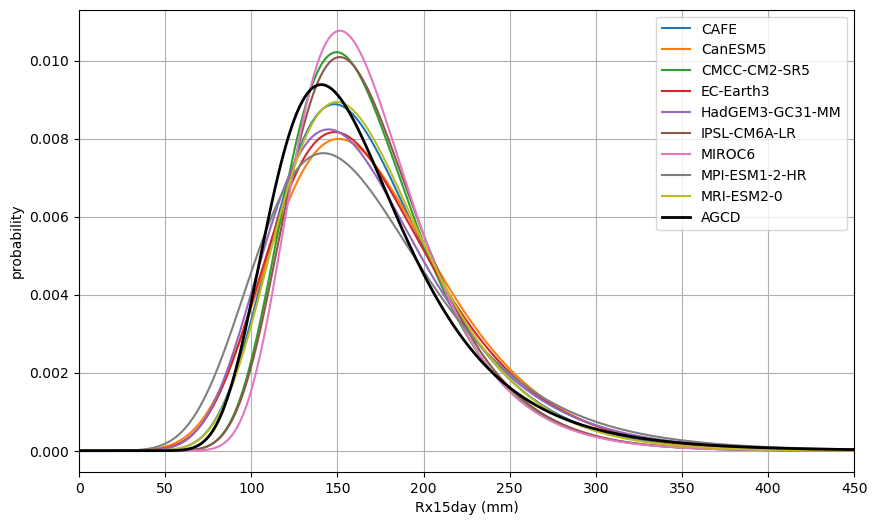

In [48]:
fig = plt.figure(figsize=[10, 6])
gev_xvals = np.arange(0, 500)

# Plot models
for model_name, model_file in model_files.items():
    model_ds = fileio.open_dataset(model_file)
    model_da = model_ds['pr'].dropna('lead_time').stack({'sample': ['ensemble', 'init_date', 'lead_time']})
    model_gev_shape, model_gev_loc, model_gev_scale = indices.fit_gev(model_da.values)
    model_gev_pdf = gev.pdf(gev_xvals, model_gev_shape, model_gev_loc, model_gev_scale)
    plt.plot(gev_xvals, model_gev_pdf, label=model_name)

agcd_gev_shape, agcd_gev_loc, agcd_gev_scale = indices.fit_gev(agcd_ds['pr'].values)
agcd_gev_pdf = gev.pdf(gev_xvals, agcd_gev_shape, agcd_gev_loc, agcd_gev_scale)
plt.plot(gev_xvals, agcd_gev_pdf, color='black', linewidth=2.0, label='AGCD')

plt.grid()
plt.xlabel('Rx15day (mm)')
plt.ylabel('probability')
#plt.title('Annual (Sep-Aug) Rx15day')
plt.xlim(0, 450)
plt.legend()

#outfile = f'/g/data/xv83/dbi599/east-coast-rain/figures/Rx15day_histogram_{model_name}_{region_name}.png'
#print(outfile)
#plt.savefig(outfile, bbox_inches='tight', facecolor='white', dpi=400)
plt.show()